<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Comparador_Palas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [5]:
list_drop = ['ID','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [6]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [7]:
df_palas = df[df.unit == 'Pala']

In [8]:
palas = pd.DataFrame(df_palas.groupby(['shiftdate','shiftindex','shift#','eqmtid']).sum().reset_index().sort_values('shiftdate'))

In [9]:
list_drop = ['start','logintime','totalloads','loadtime','idletime','spottime','tmcat00']
palas.drop(list_drop,axis=1,inplace=True)

Rendimiento


In [10]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    return int((ton/time) * 3600)

In [11]:
palas['rendimiento_efectivo'] = palas.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

In [12]:
palas_unicas = pd.DataFrame(df_palas.groupby(['eqmtid']).sum().reset_index())

In [13]:
palas[palas.rendimiento_efectivo > 1.5 * 3600]

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
7406,2020-01-26,36574,1,307,43200,15268,64,2660,0,21656,18884,0,0,0,20663
7543,2020-01-30,36582,1,BUZON,43200,3698,16,2092,0,0,41108,0,0,0,6363
10470,2020-05-09,36783,2,211,43200,240,1,20,0,66,0,42478,636,0,43200


In [14]:
palas.drop([7406,7543,10470],axis=0,inplace=True)

Fechas

In [15]:
def dia(fecha):
  aux = str(fecha.date()).split('-')
  dia = str(aux[2])
  return dia

def mes(fecha):
  aux = str(fecha.date()).split('-')
  mes = str(aux[1])
  return mes

def ano(fecha):
  aux = str(fecha.date()).split('-')
  ano = str(aux[0])
  return ano

In [16]:
palas['Dia'] = palas.apply(lambda row : dia(row['shiftdate']),axis=1)
palas['Mes'] = palas.apply(lambda row : mes(row['shiftdate']),axis=1)
palas['Año'] = palas.apply(lambda row : ano(row['shiftdate']),axis=1)

In [17]:
palas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13647 entries, 0 to 13649
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   shiftdate             13647 non-null  datetime64[ns]
 1   shiftindex            13647 non-null  int64         
 2   shift#                13647 non-null  object        
 3   eqmtid                13647 non-null  object        
 4   totaltime             13647 non-null  int64         
 5   totaltons             13647 non-null  int64         
 6   loadcnt               13647 non-null  int64         
 7   tmcat01               13647 non-null  int64         
 8   tmcat02               13647 non-null  int64         
 9   tmcat03               13647 non-null  int64         
 10  tmcat04               13647 non-null  int64         
 11  tmcat05               13647 non-null  int64         
 12  tmcat06               13647 non-null  int64         
 13  tmcat07         

In [18]:
palas_unicas.columns

Index(['eqmtid', 'shiftindex', 'start', 'logintime', 'totaltime', 'totalloads',
       'totaltons', 'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00',
       'tmcat01', 'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06',
       'tmcat07'],
      dtype='object')

In [19]:
palas_unicas.head(20)

,eqmtid,shiftindex,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
0,025,35928983,7588800,2416363,37575309,0,0,0,6686143,0,0,37575309,6686143,0,1226280,13219078,514888,15693180,235740
1,026,34754229,7272000,1611684,37575309,74,17237,74808,10904991,4597,74,37575309,10984396,0,2022510,6818207,545280,16568556,636360
2,029,32999038,6969600,600491,37575309,73,16528,80277,10507562,6111,73,37575309,10594028,600,2080445,5686847,656280,18186969,370140
3,030,31871612,6379200,28333,37575309,8,1669,10936,10116743,261,8,37575309,10127940,0,2055420,804540,332820,23892789,361800
4,210,66478032,16099200,15791575,37575309,22761,5327702,3219075,2522474,1010767,22761,37575309,6754820,0,553155,1120518,6535925,20685102,1925789
5,211,91871373,19972800,23934201,37575309,55900,12849885,8092280,4532198,3044018,55900,37575309,15678479,0,2048464,1747309,8781983,5663618,3655456
6,212,66203746,15595200,15133935,37575309,29189,6670782,3566719,1935309,1438292,29189,37575309,6946592,0,914332,326872,23043864,4622375,1721274
7,213,95351049,23616000,27973063,37575309,50441,11652120,6567740,4310421,2646965,50441,37575309,13530150,8704,1416946,1666846,9096199,5346729,6509735
8,304,11767288,2462400,0,13996800,0,0,0,0,0,0,13996800,0,0,0,43200,0,13953600,0
9,305,107276976,25776000,29631659,37575309,20751,4748854,6881270,3558927,1408868,20751,37575309,11854766,0,1300513,8767836,10357956,3462628,1831610


In [61]:
# ['026','029','030','210','211','212','213',304,'305','306','307','BUZON','RETRO']
aux = palas_unicas[(palas_unicas.eqmtid == '026') | (palas_unicas.eqmtid == '029') |
                   (palas_unicas.eqmtid == '030') | (palas_unicas.eqmtid == '210') |
                   (palas_unicas.eqmtid == '211') | (palas_unicas.eqmtid == '212') |
                   (palas_unicas.eqmtid == '213') |
                   (palas_unicas.eqmtid == '305') | (palas_unicas.eqmtid == '306') |
                   (palas_unicas.eqmtid == '307') |
                   (palas_unicas.eqmtid == 'BUZON') | (palas_unicas.eqmtid == 'RETRO')] 

In [62]:
data_times = aux[['eqmtid','tmcat01','tmcat03','tmcat04','tmcat05','tmcat06','tmcat07']]

In [63]:
def pie_plot(name,times):
  plt.pie(data_times[data_times.eqmtid == name].drop('eqmtid',axis=1).to_numpy(), 
            labels=times, autopct="%0.1f %%")
  plt.axis("equal")
  plt.title(name)

In [64]:
def all_plot(names,times):
  f = plt.figure(figsize=(8, 8))
  gs = f.add_gridspec(2, 2)

  with sns.axes_style("darkgrid"):
      ax = f.add_subplot(gs[0, 0])
      plot_pie(names[0],times)

  with sns.axes_style("white"):
      ax = f.add_subplot(gs[0, 1])
      plot_pie(names[1],times)

  with sns.axes_style("ticks"):
      ax = f.add_subplot(gs[1, 0])
      plot_pie(names[2],times)

  with sns.axes_style("whitegrid"):
      ax = f.add_subplot(gs[1, 1])
      plot_pie(names[3],times)

  f.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


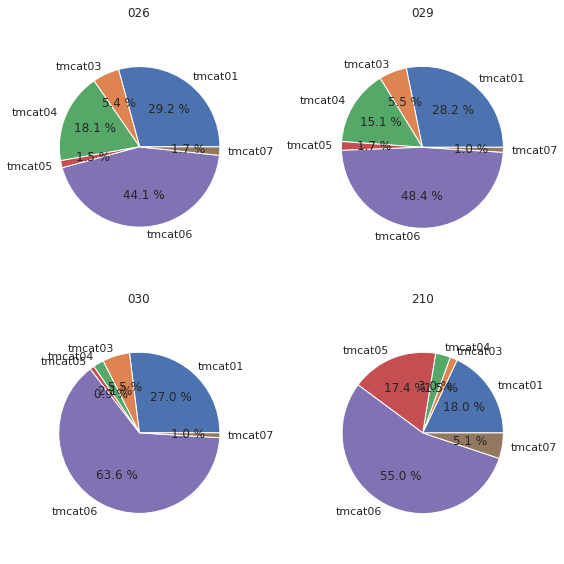

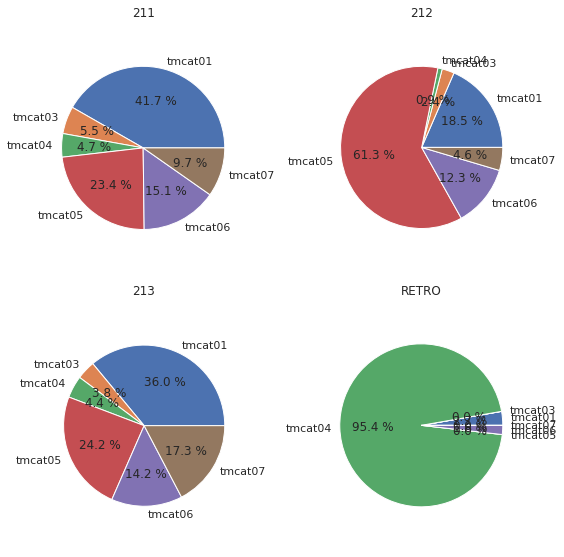

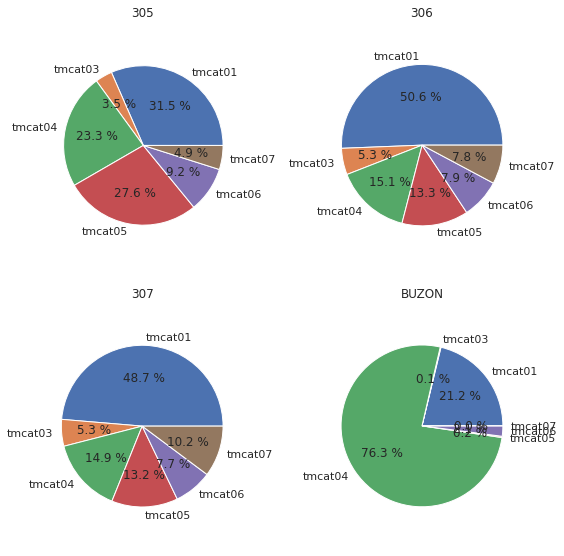

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

names_1 = ['026','029','030','210']
names_2 = ['211','212','213','RETRO']
names_3 = ['305','306','307','BUZON']
times = ['tmcat01','tmcat03','tmcat04','tmcat05','tmcat06','tmcat07']

all_plot(names_1,times)
all_plot(names_2,times)
all_plot(names_3,times)

La 304 y RETRO 

Div. años

In [40]:
data_2019 = palas[palas.Año == "2019"]
data_2020 = palas[palas.Año == "2020"]

Div. semestres

In [41]:
semestre_2_2019 = data_2019[(data_2019.Mes == '07') | (data_2019.Mes == '08') | (data_2019.Mes == '09') | (data_2019.Mes == '10') | (data_2019.Mes == '11') | (data_2019.Mes == '12')]
semestre_1_2020 = data_2020[(data_2020.Mes == '01') | (data_2020.Mes == '02') | (data_2020.Mes == '03') | (data_2020.Mes == '04') | (data_2020.Mes == '05') | (data_2020.Mes == '06')]
semestre_2_2020 = data_2020[(data_2020.Mes == '07') | (data_2020.Mes == '08') | (data_2020.Mes == '09') | (data_2020.Mes == '10') | (data_2020.Mes == '11') | (data_2020.Mes == '12')]

In [42]:
semestre_2_2019.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'eqmtid', 'totaltime', 'totaltons',
       'loadcnt', 'tmcat01', 'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05',
       'tmcat06', 'tmcat07', 'rendimiento_efectivo', 'Dia', 'Mes', 'Año'],
      dtype='object')

In [54]:
def prepare_data(data):
  return data[(data.eqmtid == '026') | (data.eqmtid == '029') |
              (data.eqmtid == '030') | (data.eqmtid == '210') |
              (data.eqmtid == '211') | (data.eqmtid == '212') |
              (data.eqmtid == '213') |
              (data.eqmtid == '305') | (data.eqmtid == '306') |
              (data.eqmtid == '307') | (data.eqmtid == 'BUZON')]

Text(0.5, 0, 'Fecha')

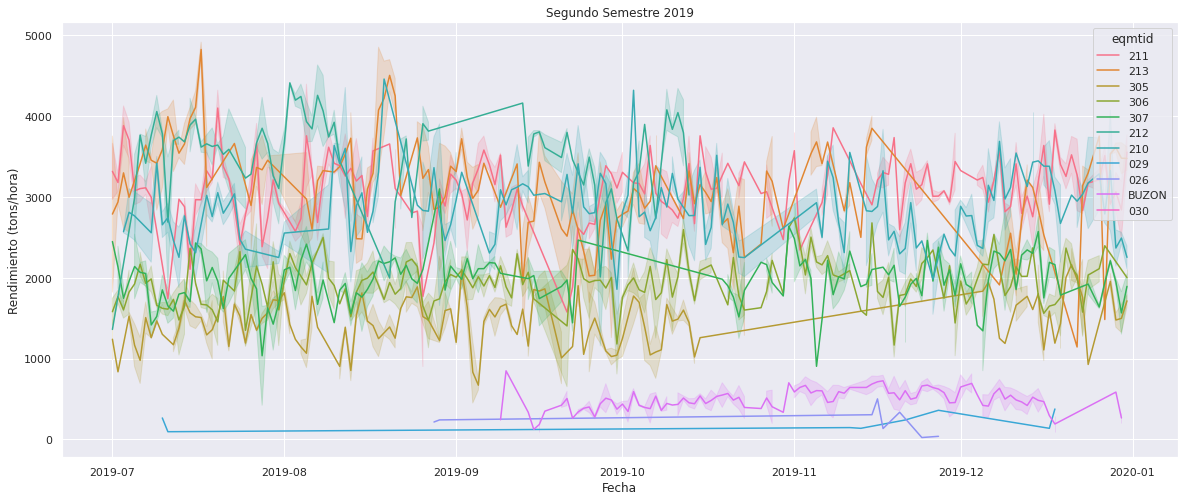

In [66]:
sns.set_theme(style="darkgrid")
aux = prepare_data(semestre_2_2019)
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
                  hue="eqmtid",
                  data=aux[(aux.totaltons != 0) & (aux.tmcat01 != 0)])
ax.set_title('Segundo Semestre 2019')
ax.set_ylabel('Rendimiento (tons/hora)')
ax.set_xlabel('Fecha')

Text(0.5, 0, 'Fecha')

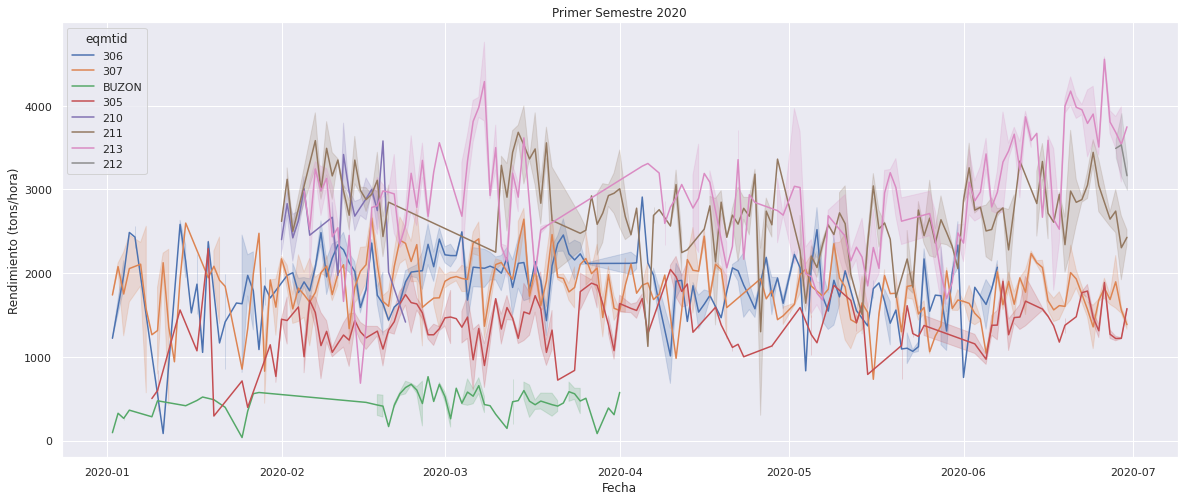

In [67]:
sns.set_theme(style="darkgrid")
aux = prepare_data(semestre_1_2020)
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
                  hue="eqmtid",
                  data=aux[(aux.totaltons != 0) & (aux.tmcat01 != 0)])
ax.set_title('Primer Semestre 2020')
ax.set_ylabel('Rendimiento (tons/hora)')
ax.set_xlabel('Fecha')

Text(0.5, 0, 'Fecha')

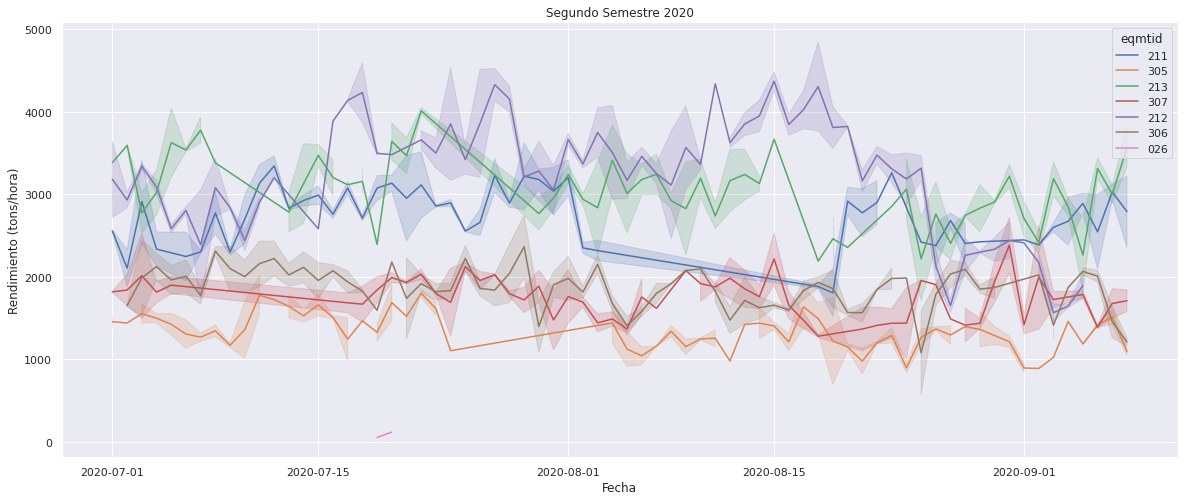

In [68]:
sns.set_theme(style="darkgrid")
aux = prepare_data(semestre_2_2020)
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
                  hue="eqmtid",
                  data=aux[(aux.totaltons != 0) & (aux.tmcat01 != 0)])
ax.set_title('Segundo Semestre 2020')
ax.set_ylabel('Rendimiento (tons/hora)')
ax.set_xlabel('Fecha')